# Model for Traffic Sign Classifier
## Step 0: Load all modules that are necessary ##

In [1]:
####### Module to retrieve pickled data######
from sklearn.utils import shuffle

########## Plotting Data ########
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
from tqdm import trange
import time
from datetime import datetime
from PreProcessing import load_data, preprocess_data, apply_projection_transform, visualize_dataset, images_show, visualize_dataset, summarize_histogram,ahisteq

###### Visualizing DataFrame ########
import pandas as pd

####### Image Operations ###########
from skimage import img_as_ubyte
from skimage import img_as_float
import cv2

####### Mathematical & Array Operations #########
import numpy as np
import math
from random import randint
from collections import namedtuple

%matplotlib inline

Modules Imported


## Step 1: Exploratory visualization of dataset ##
* Load the dataset and display histogram
* Repeat for each dataset 
* Load total Summary of dataset as a histogram 

In [3]:
######### Define the name of the training, test and validation files #############
train='train.p'
test='test.p'
valid='valid.p'

######### Overall Summary ##############
summarize_histogram(train, test, valid)

############# Load data for Individual Summary ################################
X_train,Y_train=load_data(train)
visualize_dataset(X_train,Y_train,view_histogram=True, show_images=True, show_all_classes=True)
X_test,Y_test=load_data(test)
visualize_dataset(X_test,Y_test,view_histogram=True, show_images=True, show_all_classes=True)
X_valid,Y_valid=load_data(valid)
visualize_dataset(X_valid,Y_valid,view_histogram=True, show_images=True, show_all_classes=True)

Data and Modules loaded
Data and Modules loaded
Data and Modules loaded


FileNotFoundError: File b'signnames.csv' does not exist

## Dataset Discussion and Observations ##

### Size of Dataset
* The GTSRB dataset provided is far from enough to allow a deep network to learn its features 
* So the dataset needs to extended to an agreeable level as we are going to train it from scratch 

### Distribution of Classes
* The class ID with ID 2 Speed limit 50 kmph has the highest number of images 2010 while there are classes with less than 180 images. 
* Balancing the dataset becomes paramount as we want the performance to be uniform across classes.

### Image Quality
* The images in all datasets especially test set are dark or bright , so imaage processing may have to be done additional to normalization and scaling.



## Step 2: PreProcess Data and Visualize it ##

### Pre-Process Idea ####
* Training Data needs to be Scaled and Normalized , Extended , Also Augmented , Balanced 
* It is sufficient to scale and normalize the validation & test data

### Scaling and Normalization ####
* CLAHE ( Contrast Limited Adaptive Histogram Equalization )  for normalizing the image dataset as per recommendations from reviewer. It is observed that the CLAHE normalization itself scales the image so there is no need to scale the image separately


### Types of augmentation techniques & rationale
* We want our network to be invariant to scale , rotations, color and lighting conditions . Hence 
* Zoom, Rotation , Shear , Brightness Distrubance , Gaussian noise , color inversion etc.

  0%|          | 6/34799 [00:00<09:47, 59.27it/s]

Data and Modules loaded
Scaling dataset and normalizing it using CLAHE


100%|██████████| 34799/34799 [09:20<00:00, 62.13it/s]


Scaling Complete
Number of training examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= float32
Class Number:0 Sign Name:Speed limit (20km/h) Number of Samples:180


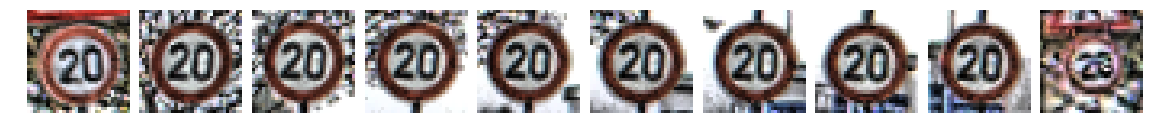

Class Number:1 Sign Name:Speed limit (30km/h) Number of Samples:1980


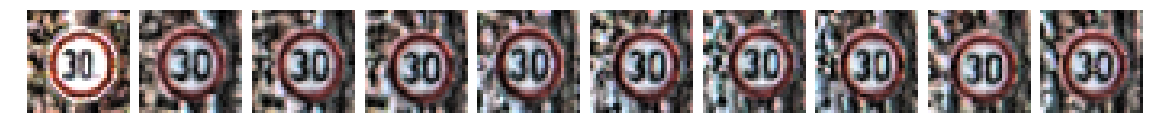

Class Number:2 Sign Name:Speed limit (50km/h) Number of Samples:2010


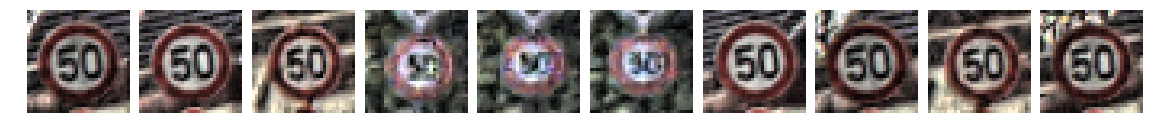

Class Number:3 Sign Name:Speed limit (60km/h) Number of Samples:1260


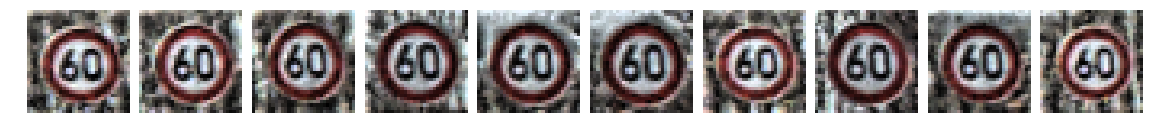

Class Number:4 Sign Name:Speed limit (70km/h) Number of Samples:1770


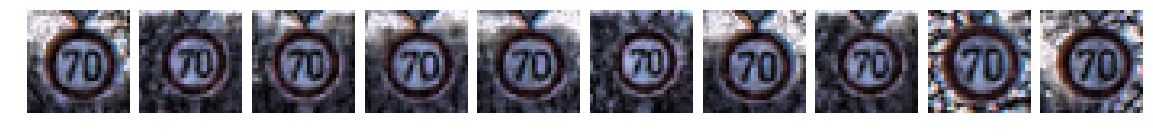

Class Number:5 Sign Name:Speed limit (80km/h) Number of Samples:1650


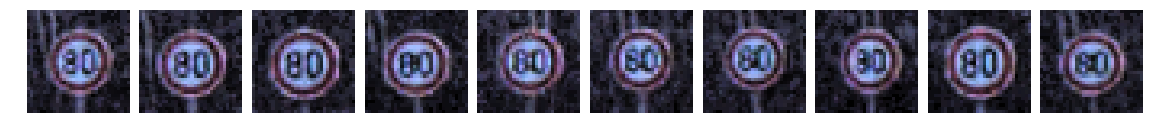

Class Number:6 Sign Name:End of speed limit (80km/h) Number of Samples:360


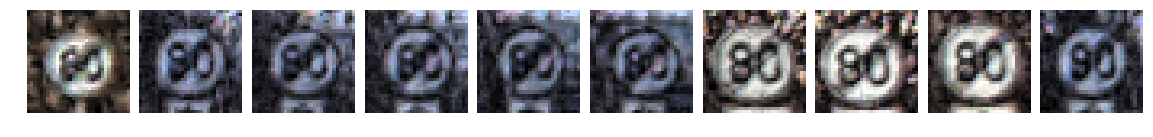

Class Number:7 Sign Name:Speed limit (100km/h) Number of Samples:1290


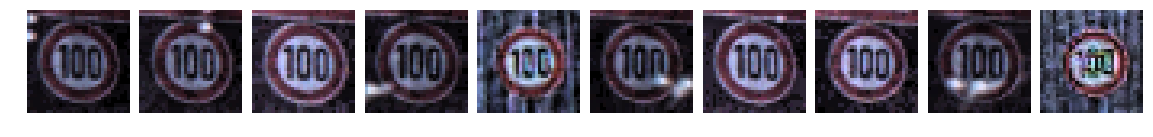

Class Number:8 Sign Name:Speed limit (120km/h) Number of Samples:1260


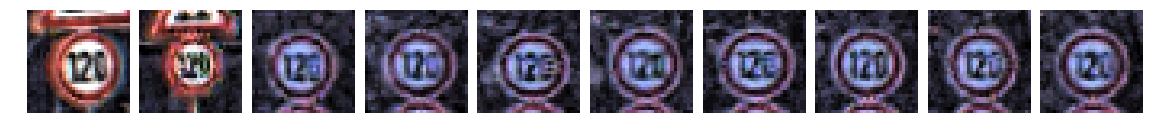

Class Number:9 Sign Name:No passing Number of Samples:1320


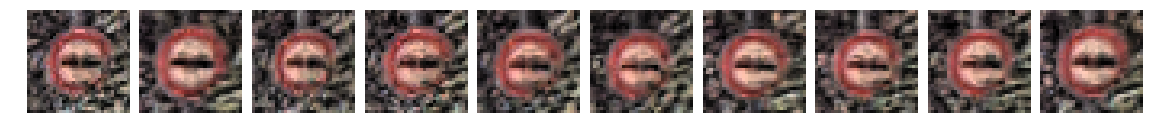

Class Number:10 Sign Name:No passing for vehicles over 3.5 metric tons Number of Samples:1800


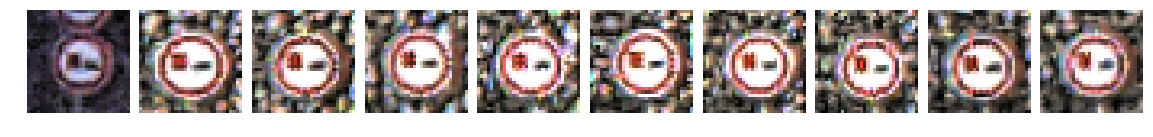

Class Number:11 Sign Name:Right-of-way at the next intersection Number of Samples:1170


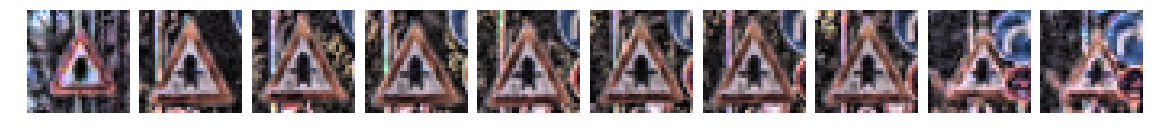

Class Number:12 Sign Name:Priority road Number of Samples:1890


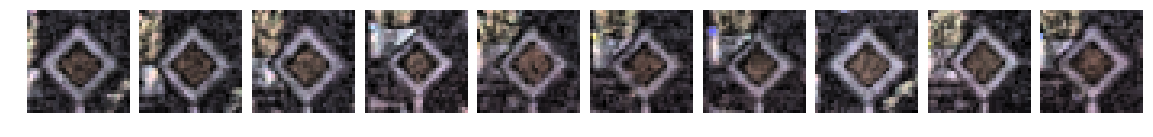

Class Number:13 Sign Name:Yield Number of Samples:1920


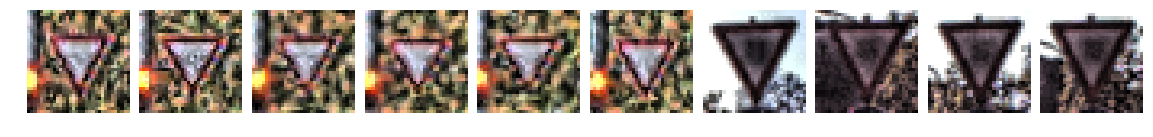

Class Number:14 Sign Name:Stop Number of Samples:690


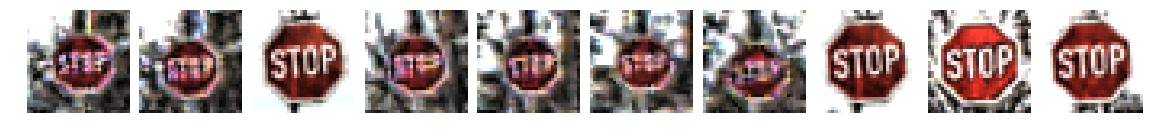

Class Number:15 Sign Name:No vehicles Number of Samples:540


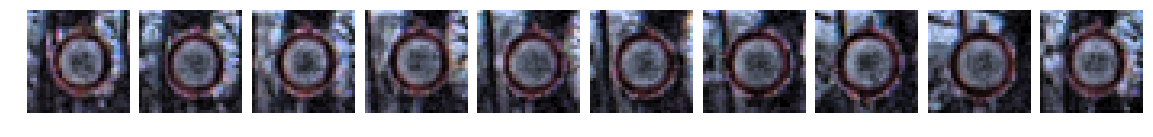

Class Number:16 Sign Name:Vehicles over 3.5 metric tons prohibited Number of Samples:360


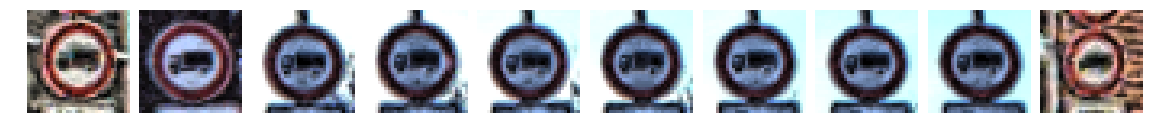

Class Number:17 Sign Name:No entry Number of Samples:990


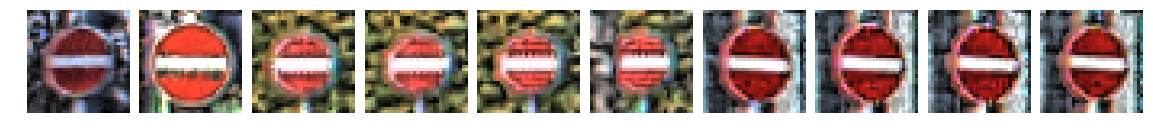

Class Number:18 Sign Name:General caution Number of Samples:1080


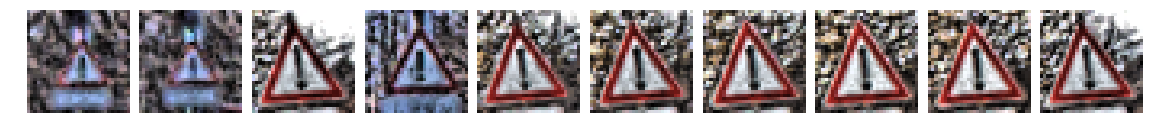

Class Number:19 Sign Name:Dangerous curve to the left Number of Samples:180


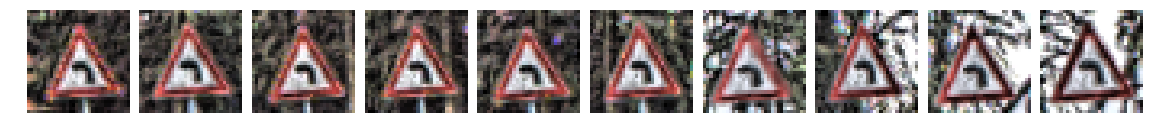

Class Number:20 Sign Name:Dangerous curve to the right Number of Samples:300


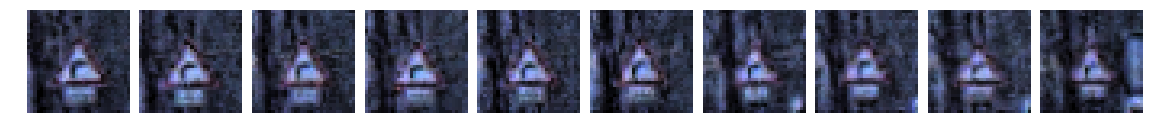

Class Number:21 Sign Name:Double curve Number of Samples:270


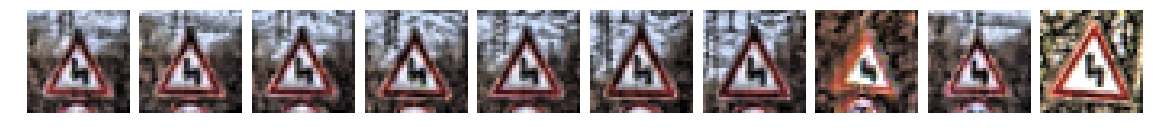

Class Number:22 Sign Name:Bumpy road Number of Samples:330


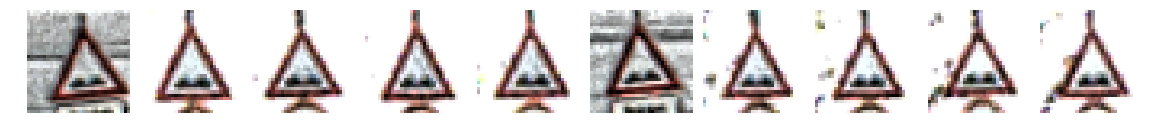

Class Number:23 Sign Name:Slippery road Number of Samples:450


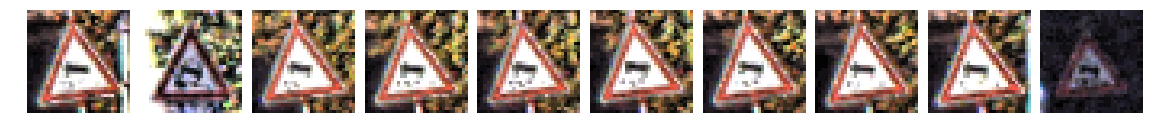

Class Number:24 Sign Name:Road narrows on the right Number of Samples:240


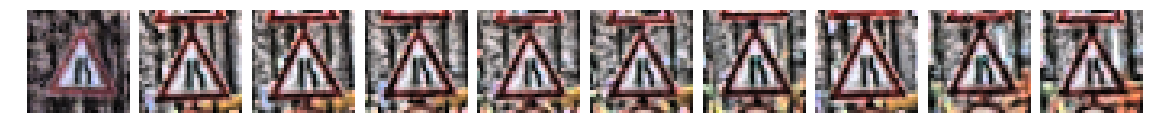

Class Number:25 Sign Name:Road work Number of Samples:1350


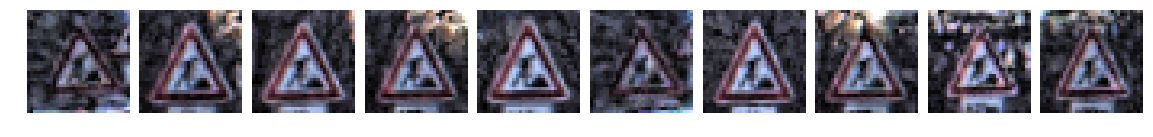

Class Number:26 Sign Name:Traffic signals Number of Samples:540


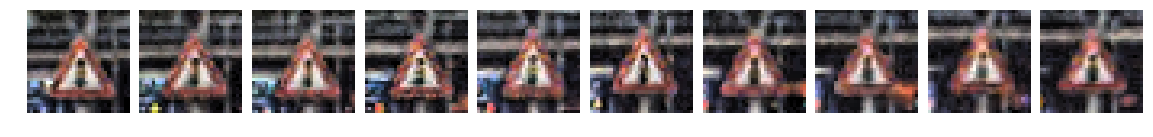

Class Number:27 Sign Name:Pedestrians Number of Samples:210


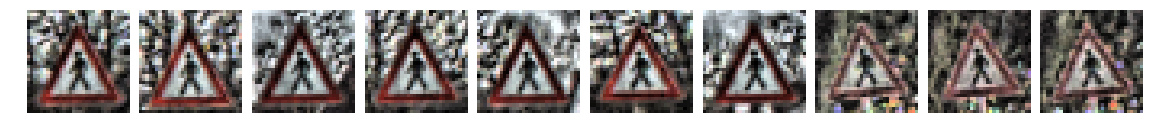

Class Number:28 Sign Name:Children crossing Number of Samples:480


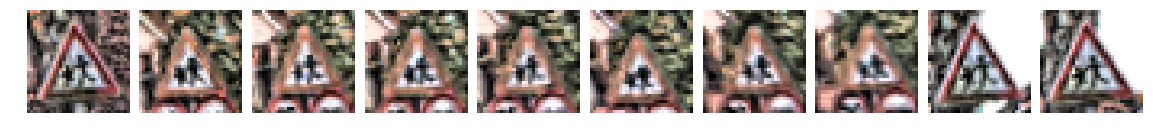

Class Number:29 Sign Name:Bicycles crossing Number of Samples:240


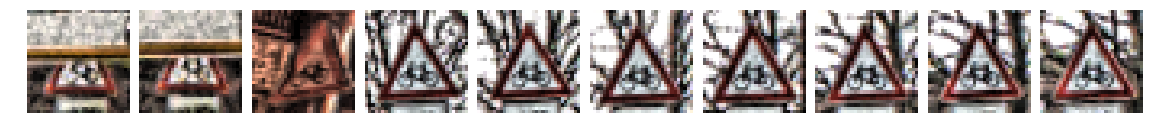

Class Number:30 Sign Name:Beware of ice/snow Number of Samples:390


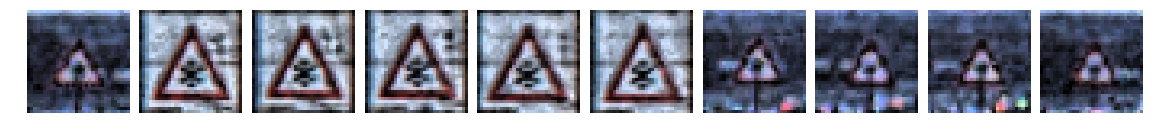

Class Number:31 Sign Name:Wild animals crossing Number of Samples:690


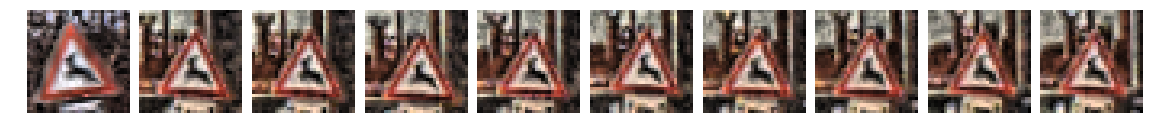

Class Number:32 Sign Name:End of all speed and passing limits Number of Samples:210


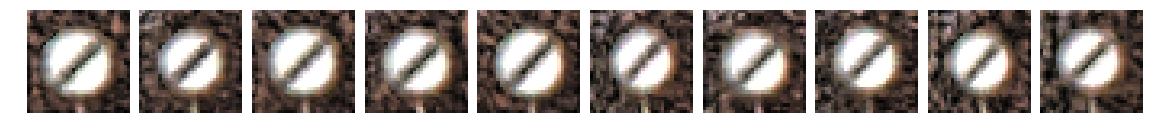

Class Number:33 Sign Name:Turn right ahead Number of Samples:599


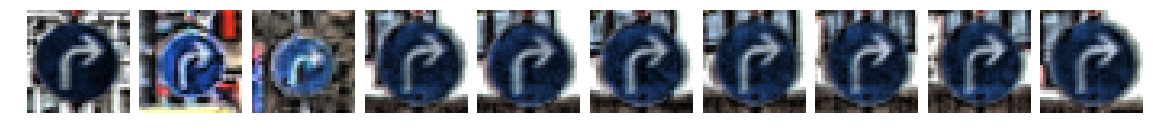

Class Number:34 Sign Name:Turn left ahead Number of Samples:360


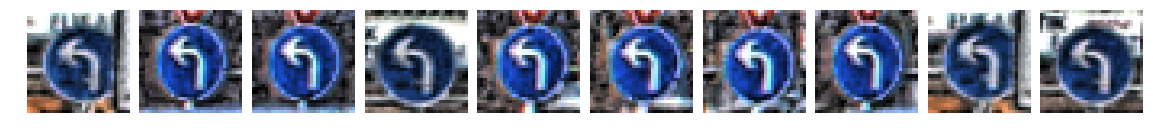

Class Number:35 Sign Name:Ahead only Number of Samples:1080


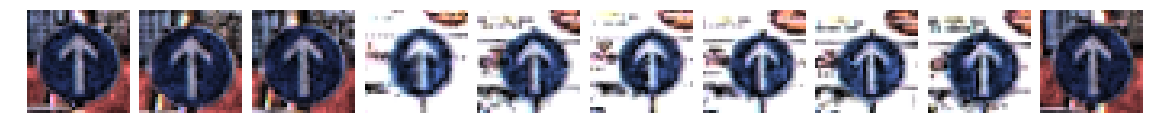

Class Number:36 Sign Name:Go straight or right Number of Samples:330


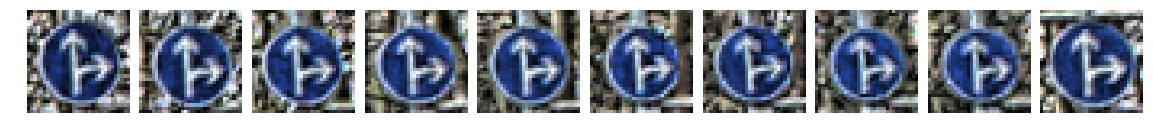

Class Number:37 Sign Name:Go straight or left Number of Samples:180


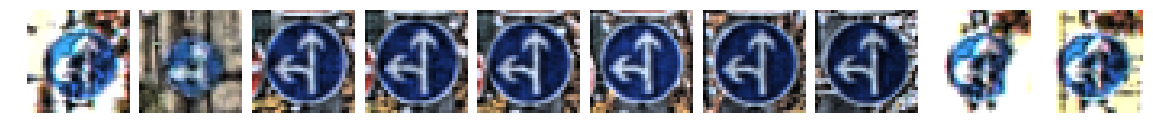

Class Number:38 Sign Name:Keep right Number of Samples:1860


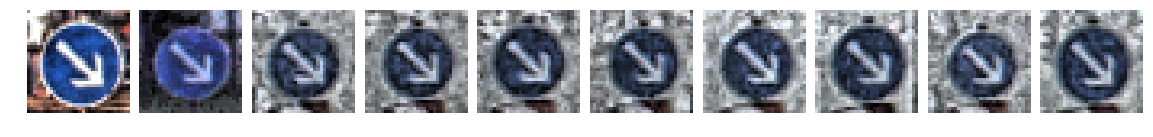

Class Number:39 Sign Name:Keep left Number of Samples:270


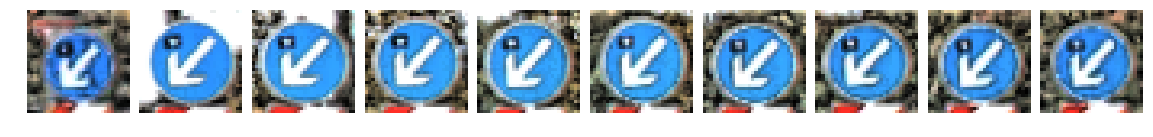

Class Number:40 Sign Name:Roundabout mandatory Number of Samples:300


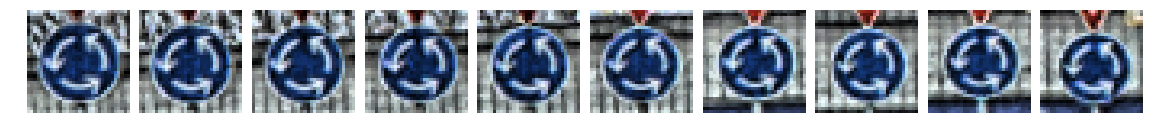

Class Number:41 Sign Name:End of no passing Number of Samples:210


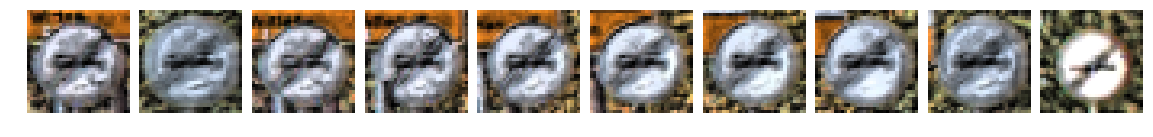

Class Number:42 Sign Name:End of no passing by vehicles over 3.5 metric tons Number of Samples:210


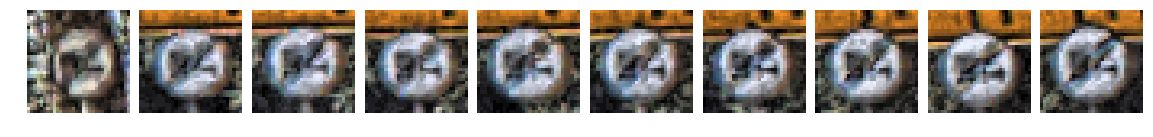

Extending Dataset
Dataset Extended based on Flipping, Mirroring 0-180 Degrees


ClassId                                           SignName  Counts  \
0         0                               Speed limit (20km/h)     180   
1         1                               Speed limit (30km/h)    3960   
2         2                               Speed limit (50km/h)    2010   
3         3                               Speed limit (60km/h)    1260   
4         4                               Speed limit (70km/h)    1770   
5         5                               Speed limit (80km/h)    3300   
6         6                        End of speed limit (80km/h)     360   
7         7                              Speed limit (100km/h)    1290   
8         8                              Speed limit (120km/h)    1260   
9         9                                         No passing    1320   
10       10       No passing for vehicles over 3.5 metric tons    1800   
11       11              Right-of-way at the next intersection    2340   
12       12                                      Priority road    7560   
13       13                                              Yield    3840   
14       14                                               Stop     690   
15       15                                        No vehicles    2160   
16       16           Vehicles over 3.5 metric tons prohibited     360   
17       17                                           No entry    3960   
18       18                                    General caution    2160   
19       19                        Dangerous curve to the left     480   
20       20                       Dangerous curve to the right     480   
21       21                                       Double curve     270   
22       22                                         Bumpy road     660   
23       23                                      Slippery road     450   
24       24                          Road narrows on the right     240   
25       25                                          Road work    1350   
26       26                                    Traffic signals    1080   
27       27                                        Pedestrians     210   
28       28                                  Children crossing     480   
29       29                                  Bicycles crossing     240   
30       30                                 Beware of ice/snow     780   
31       31                              Wild animals crossing     690   
32       32                End of all speed and passing limits     420   
33       33                                   Turn right ahead     959   
34       34                                    Turn left ahead     959   
35       35                                         Ahead only    2160   
36       36                               Go straight or right     510   
37       37                                Go straight or left     510   
38       38                                         Keep right    2130   
39       39                                          Keep left    2130   
40       40                               Roundabout mandatory     600   
41       41                                  End of no passing     210   
42       42  End of no passing by vehicles over 3.5 metric ...     210   

   Horizontally Flippable Vertically Flippable Flippable Both Ways  \
0                      no                   no                  no   
1                      no                  yes                  no   
2                      no                   no                  no   
3                      no                   no                  no   
4                      no                   no                  no   
5                      no                  yes                  no   
6                      no                   no                  no   
7                      no                   no                  no   
8                      no                   no                  no   
9                      no                   no 

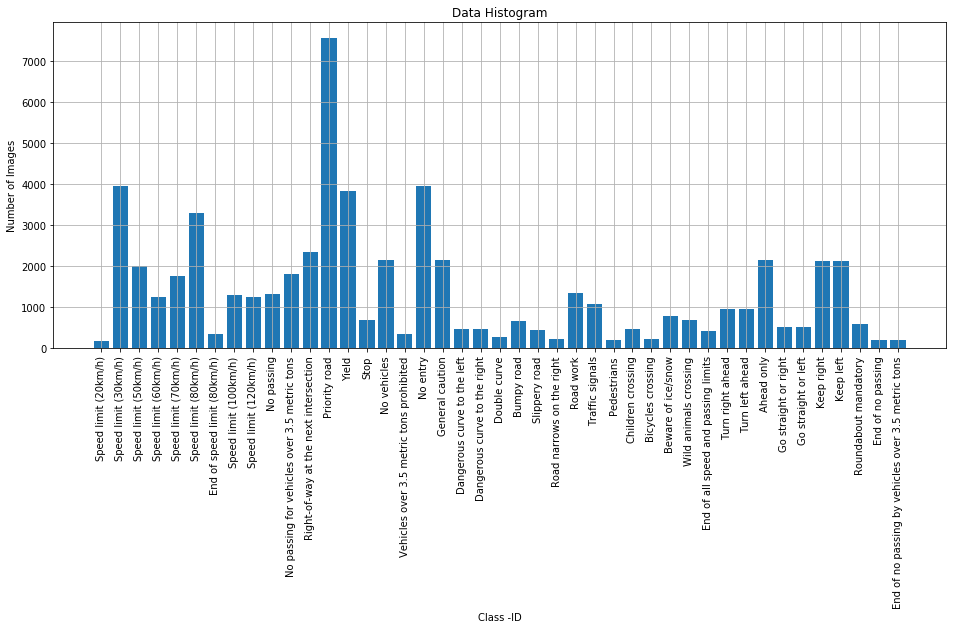

Number of training examples = 59788
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= float32
Data Augmentation Started


 12%|█▏        | 5/43 [00:00<00:00, 45.21it/s]

Balancing Dataset by truncating data at random


100%|██████████| 43/43 [00:00<00:00, 46.40it/s]


Making the dataset divisible by 100 by adding images
New Dataset Size: 86100
Data Augmentation Complete


ClassId                                           SignName  Counts  \
0         0                               Speed limit (20km/h)    2042   
1         1                               Speed limit (30km/h)    2000   
2         2                               Speed limit (50km/h)    2002   
3         3                               Speed limit (60km/h)    2002   
4         4                               Speed limit (70km/h)    2001   
5         5                               Speed limit (80km/h)    2003   
6         6                        End of speed limit (80km/h)    2000   
7         7                              Speed limit (100km/h)    1999   
8         8                              Speed limit (120km/h)    2002   
9         9                                         No passing    2001   
10       10       No passing for vehicles over 3.5 metric tons    2003   
11       11              Right-of-way at the next intersection    2002   
12       12                                      Priority road    2002   
13       13                                              Yield    2003   
14       14                                               Stop    2001   
15       15                                        No vehicles    2002   
16       16           Vehicles over 3.5 metric tons prohibited    2001   
17       17                                           No entry    2002   
18       18                                    General caution    2001   
19       19                        Dangerous curve to the left    2000   
20       20                       Dangerous curve to the right    2000   
21       21                                       Double curve    2004   
22       22                                         Bumpy road    2002   
23       23                                      Slippery road    2000   
24       24                          Road narrows on the right    2001   
25       25                                          Road work    2002   
26       26                                    Traffic signals    2002   
27       27                                        Pedestrians    2002   
28       28                                  Children crossing    2000   
29       29                                  Bicycles crossing    2004   
30       30                                 Beware of ice/snow    2001   
31       31                              Wild animals crossing    2004   
32       32                End of all speed and passing limits    2001   
33       33                                   Turn right ahead    2002   
34       34                                    Turn left ahead    2001   
35       35                                         Ahead only    2000   
36       36                               Go straight or right    2002   
37       37                                Go straight or left    2000   
38       38                                         Keep right    2000   
39       39                                          Keep left    2001   
40       40                               Roundabout mandatory    2000   
41       41                                  End of no passing    2000   
42       42  End of no passing by vehicles over 3.5 metric ...    2002   

   Horizontally Flippable Vertically Flippable Flippable Both Ways  \
0                      no                   no                  no   
1                      no                  yes                  no   
2                      no                   no                  no   
3                      no                   no                  no   
4                      no                   no                  no   
5                      no                  yes                  no   
6                      no                   no                  no   
7                      no                   no                  no   
8                      no                   no                  no   
9                      no                   no 

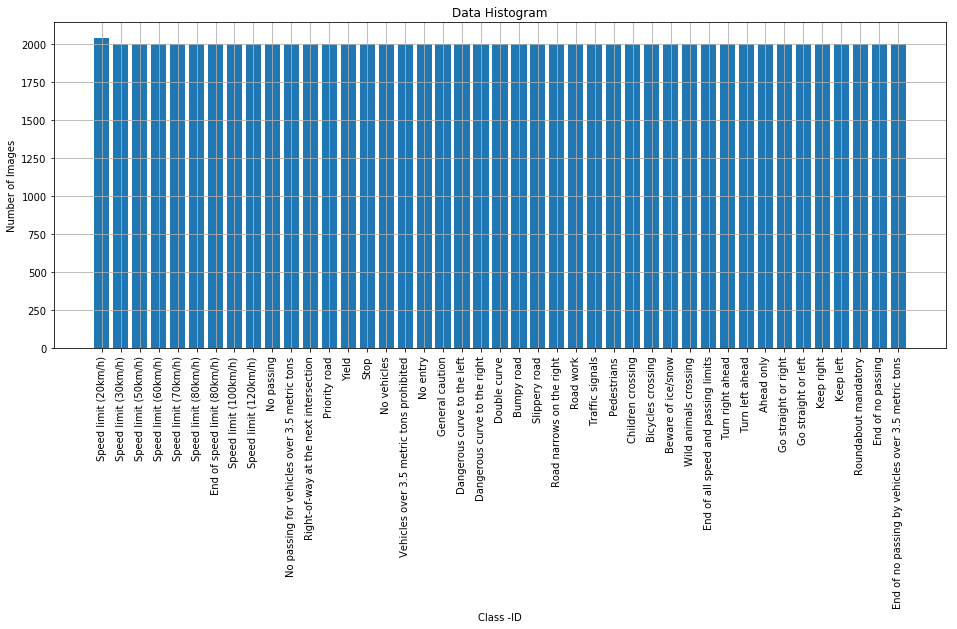

Number of training examples = 86100
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= float32


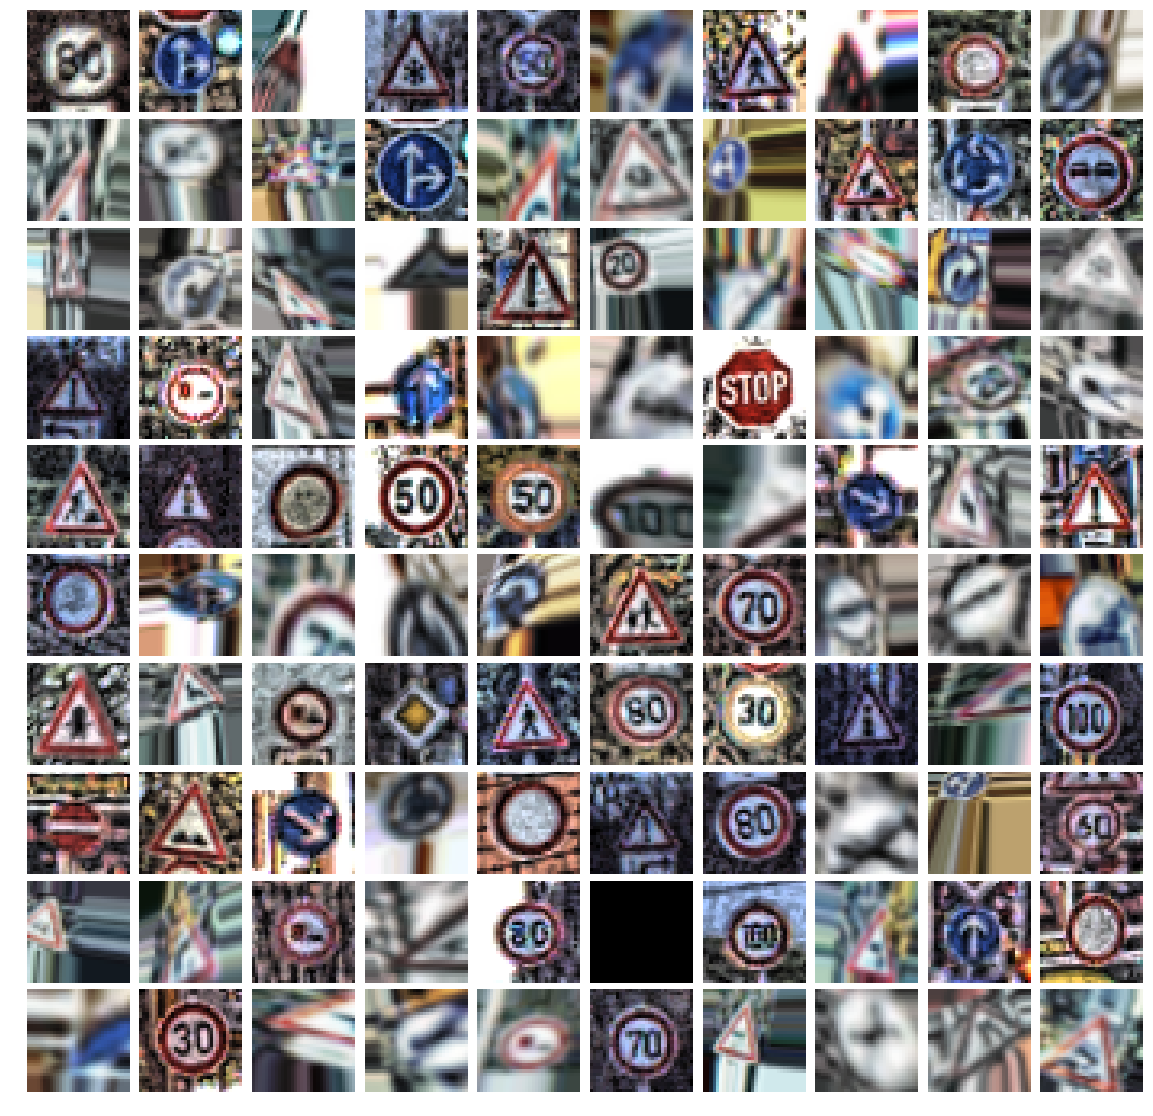

Data Saved in : train_aug.pickle
pre-processing complete. The file is train_aug.pickle


  0%|          | 7/4410 [00:00<01:11, 61.43it/s]

Data and Modules loaded
Scaling dataset and normalizing it using CLAHE


100%|██████████| 4410/4410 [01:13<00:00, 60.41it/s]


Scaling Complete
Number of training examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= float32
Class Number:0 Sign Name:Speed limit (20km/h) Number of Samples:30


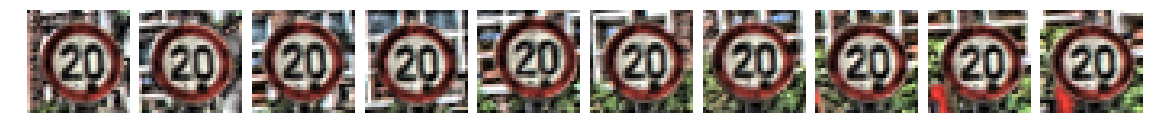

Class Number:1 Sign Name:Speed limit (30km/h) Number of Samples:240


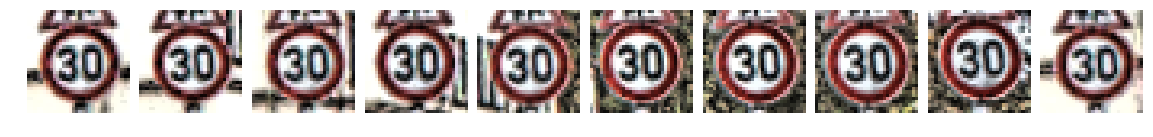

Class Number:2 Sign Name:Speed limit (50km/h) Number of Samples:240


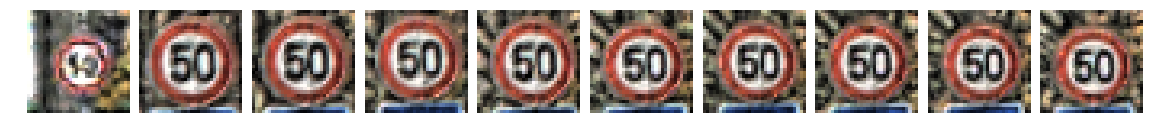

Class Number:3 Sign Name:Speed limit (60km/h) Number of Samples:150


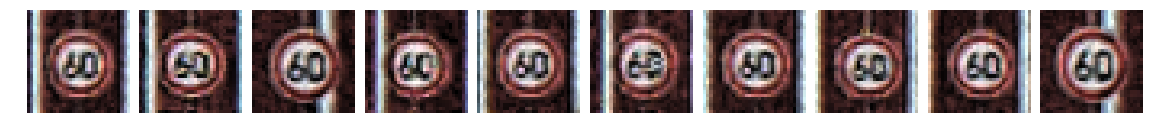

Class Number:4 Sign Name:Speed limit (70km/h) Number of Samples:210


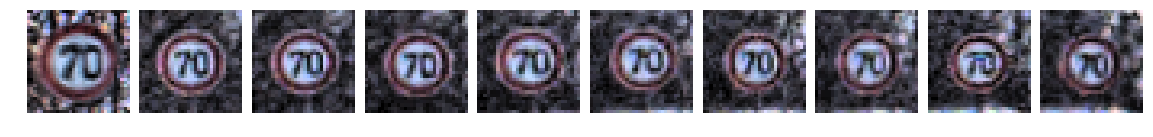

Class Number:5 Sign Name:Speed limit (80km/h) Number of Samples:210


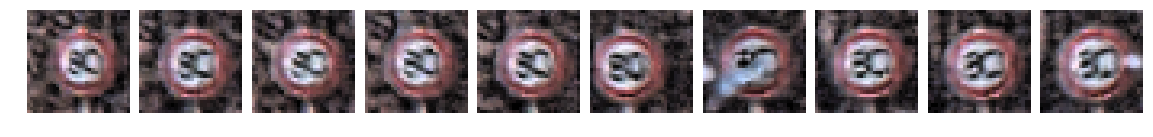

Class Number:6 Sign Name:End of speed limit (80km/h) Number of Samples:60


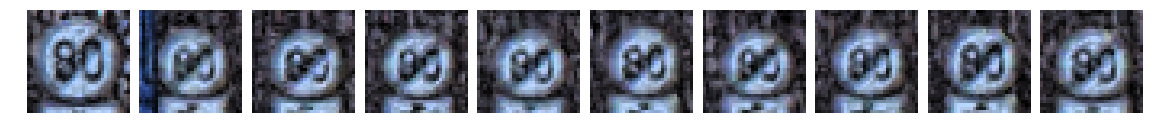

Class Number:7 Sign Name:Speed limit (100km/h) Number of Samples:150


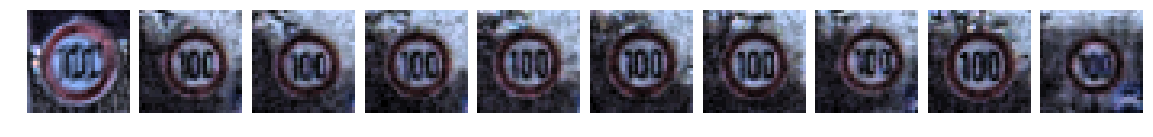

Class Number:8 Sign Name:Speed limit (120km/h) Number of Samples:150


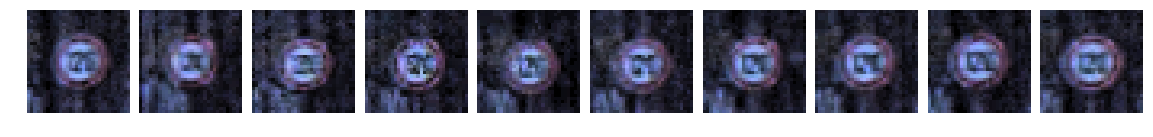

Class Number:9 Sign Name:No passing Number of Samples:150


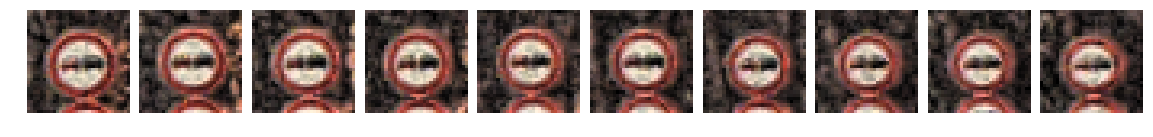

Class Number:10 Sign Name:No passing for vehicles over 3.5 metric tons Number of Samples:210


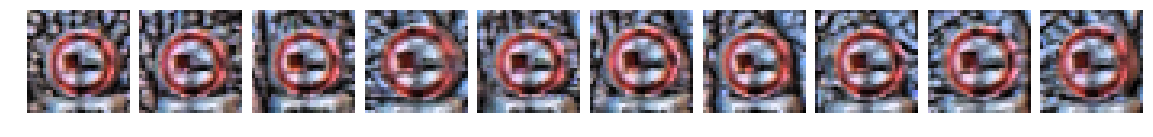

Class Number:11 Sign Name:Right-of-way at the next intersection Number of Samples:150


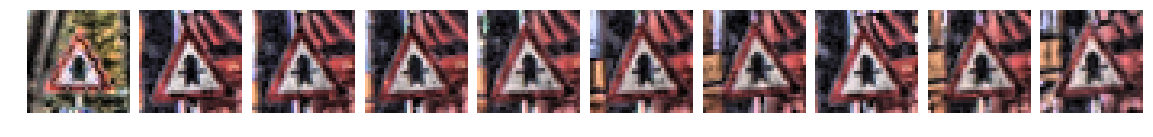

Class Number:12 Sign Name:Priority road Number of Samples:210


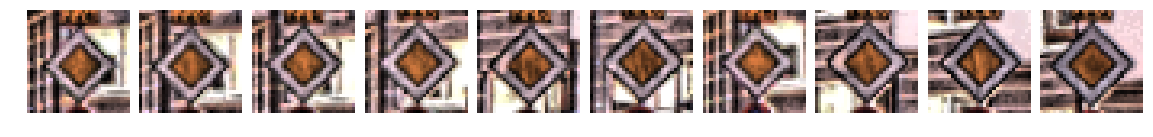

Class Number:13 Sign Name:Yield Number of Samples:240


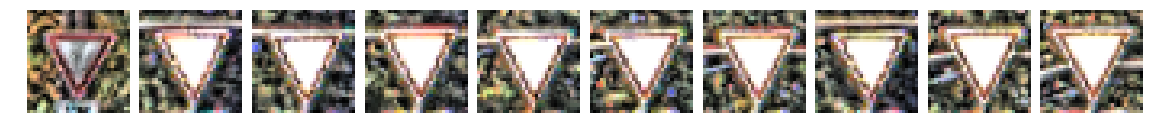

Class Number:14 Sign Name:Stop Number of Samples:90


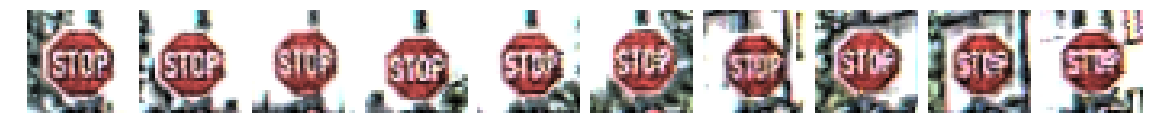

Class Number:15 Sign Name:No vehicles Number of Samples:90


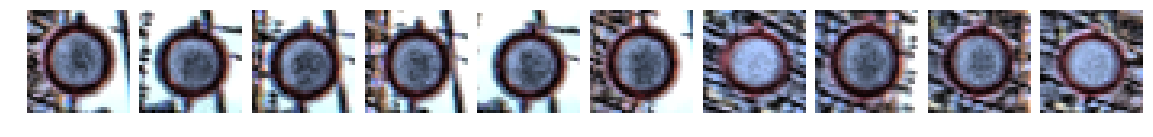

Class Number:16 Sign Name:Vehicles over 3.5 metric tons prohibited Number of Samples:60


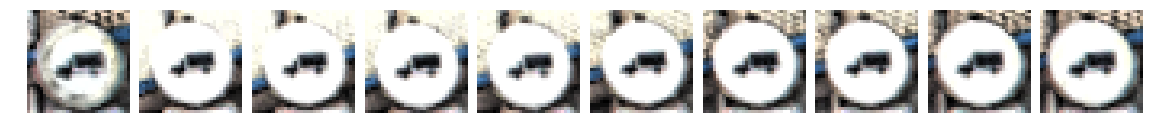

Class Number:17 Sign Name:No entry Number of Samples:120


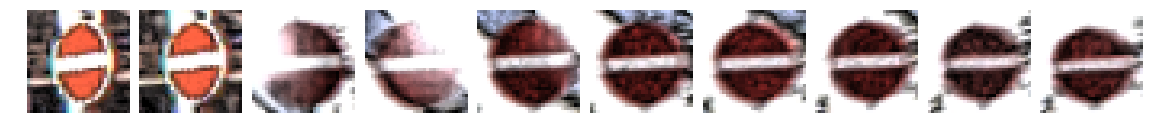

Class Number:18 Sign Name:General caution Number of Samples:120


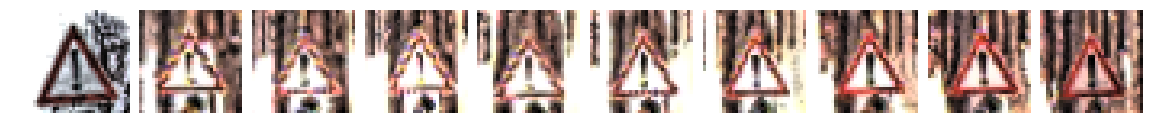

Class Number:19 Sign Name:Dangerous curve to the left Number of Samples:30


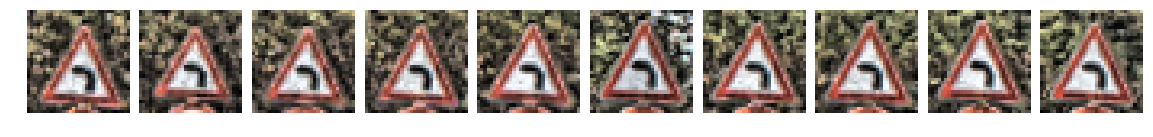

Class Number:20 Sign Name:Dangerous curve to the right Number of Samples:60


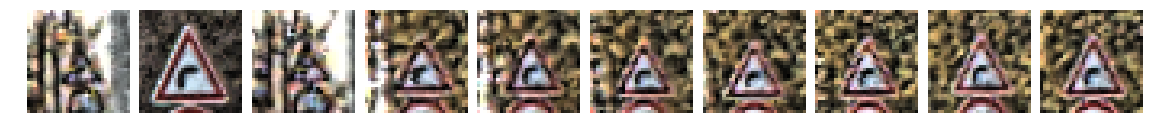

Class Number:21 Sign Name:Double curve Number of Samples:60


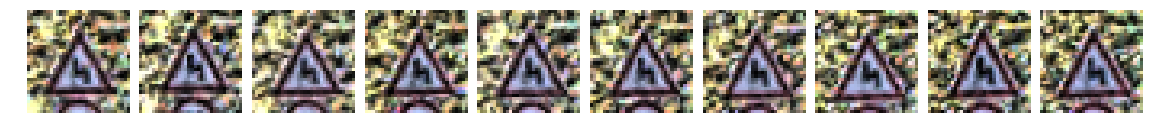

Class Number:22 Sign Name:Bumpy road Number of Samples:60


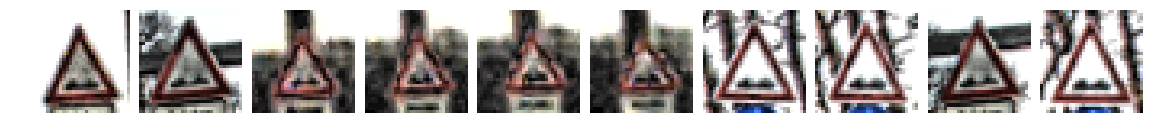

Class Number:23 Sign Name:Slippery road Number of Samples:60


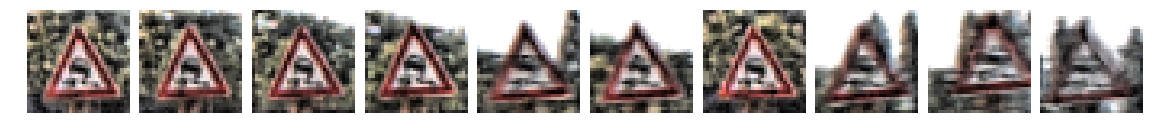

Class Number:24 Sign Name:Road narrows on the right Number of Samples:30


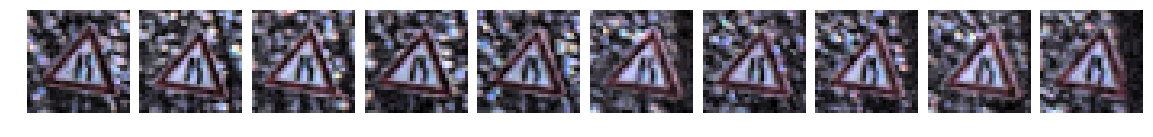

Class Number:25 Sign Name:Road work Number of Samples:150


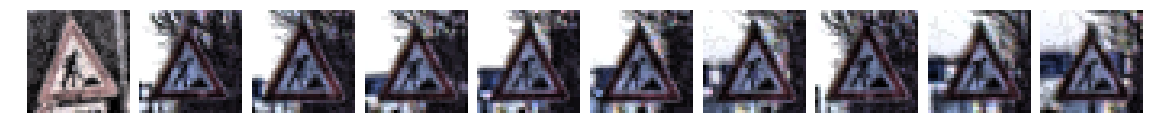

Class Number:26 Sign Name:Traffic signals Number of Samples:60


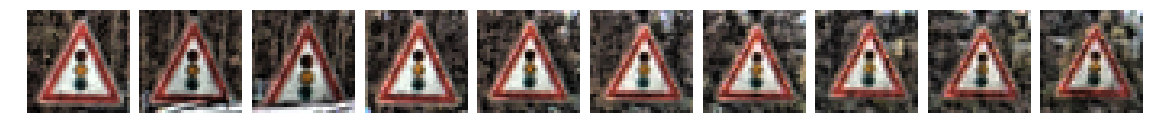

Class Number:27 Sign Name:Pedestrians Number of Samples:30


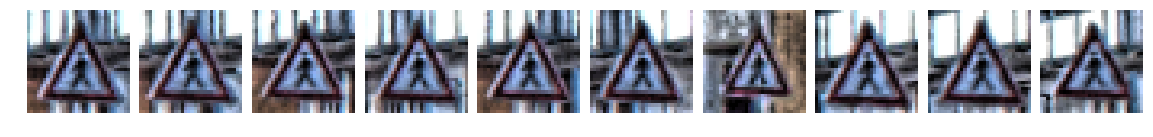

Class Number:28 Sign Name:Children crossing Number of Samples:60


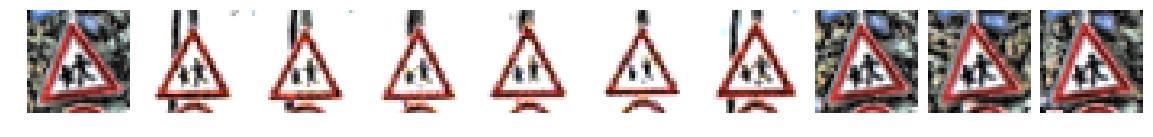

Class Number:29 Sign Name:Bicycles crossing Number of Samples:30


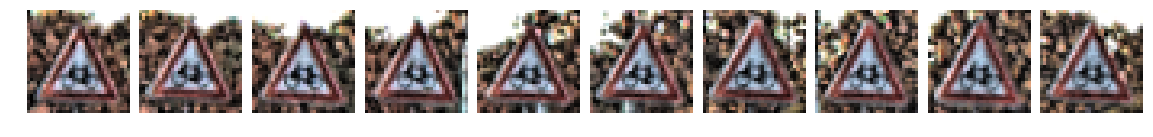

Class Number:30 Sign Name:Beware of ice/snow Number of Samples:60


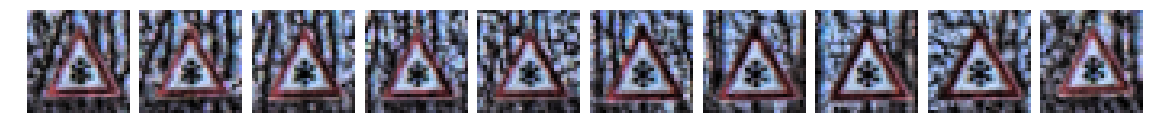

Class Number:31 Sign Name:Wild animals crossing Number of Samples:90


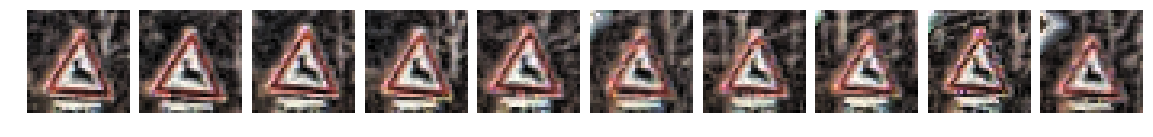

Class Number:32 Sign Name:End of all speed and passing limits Number of Samples:30


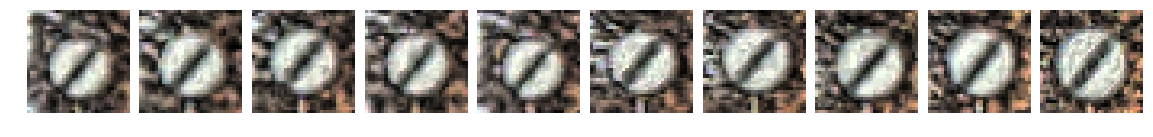

Class Number:33 Sign Name:Turn right ahead Number of Samples:90


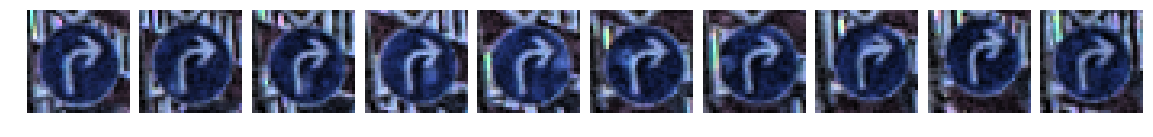

Class Number:34 Sign Name:Turn left ahead Number of Samples:60


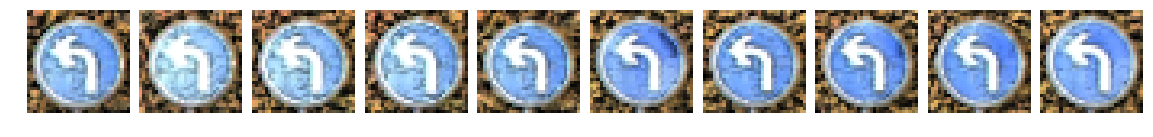

Class Number:35 Sign Name:Ahead only Number of Samples:120


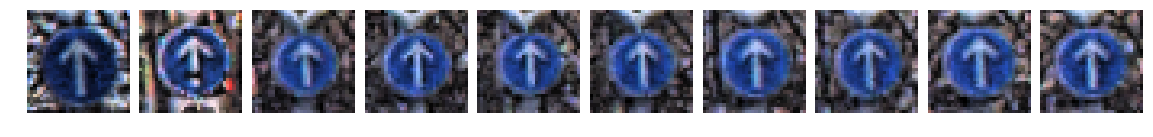

Class Number:36 Sign Name:Go straight or right Number of Samples:60


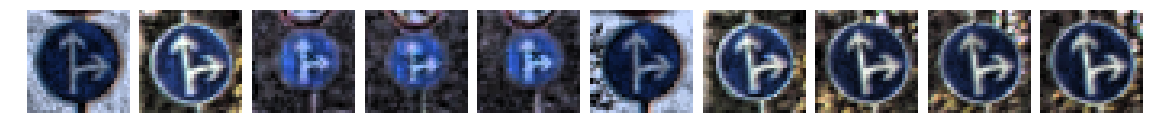

Class Number:37 Sign Name:Go straight or left Number of Samples:30


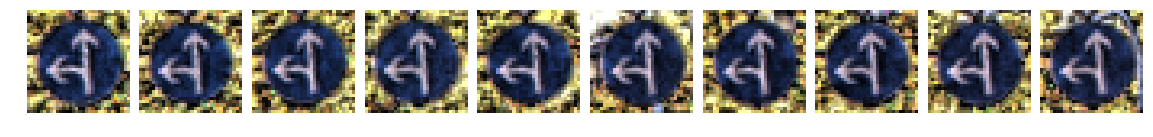

Class Number:38 Sign Name:Keep right Number of Samples:210


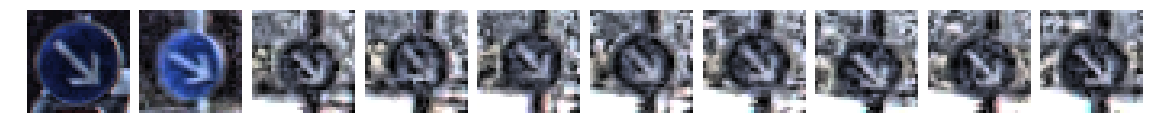

Class Number:39 Sign Name:Keep left Number of Samples:30


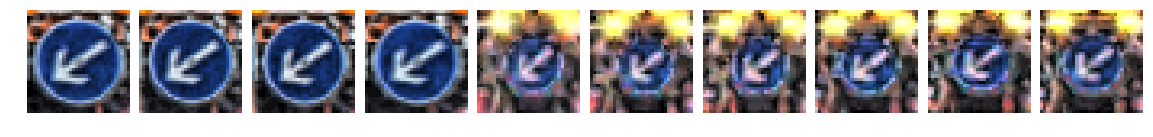

Class Number:40 Sign Name:Roundabout mandatory Number of Samples:60


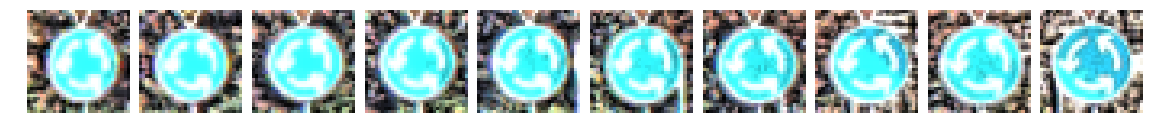

Class Number:41 Sign Name:End of no passing Number of Samples:30


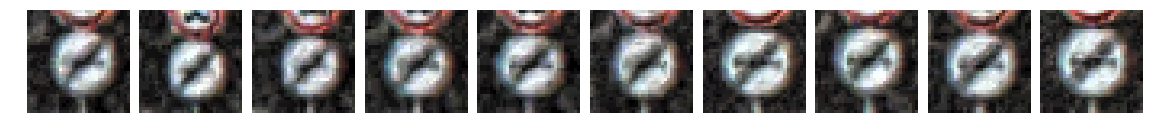

Class Number:42 Sign Name:End of no passing by vehicles over 3.5 metric tons Number of Samples:30


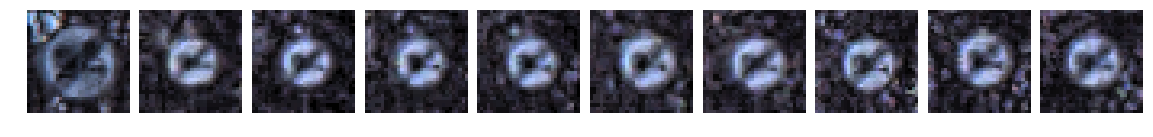

Data Saved in : valid_aug.pickle
pre-processing complete. The file is valid_aug.pickle


  0%|          | 6/12630 [00:00<03:35, 58.59it/s]

Data and Modules loaded
Scaling dataset and normalizing it using CLAHE


100%|██████████| 12630/12630 [03:27<00:00, 61.27it/s]


Scaling Complete
Number of training examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Image Datatype= float32
Class Number:0 Sign Name:Speed limit (20km/h) Number of Samples:60


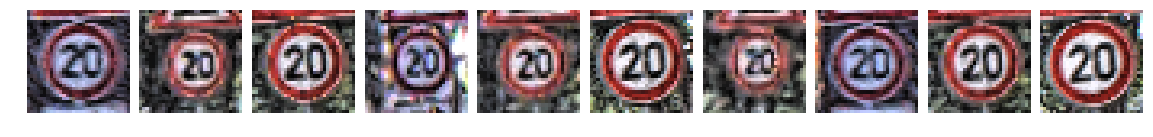

Class Number:1 Sign Name:Speed limit (30km/h) Number of Samples:720


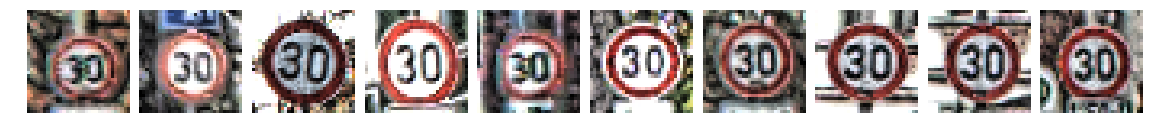

Class Number:2 Sign Name:Speed limit (50km/h) Number of Samples:750


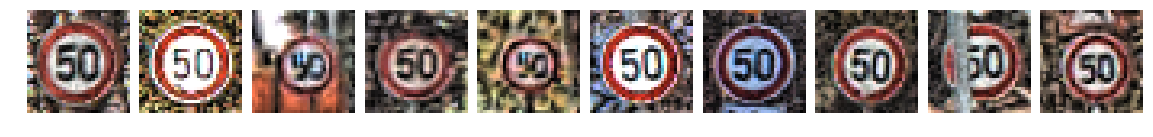

Class Number:3 Sign Name:Speed limit (60km/h) Number of Samples:450


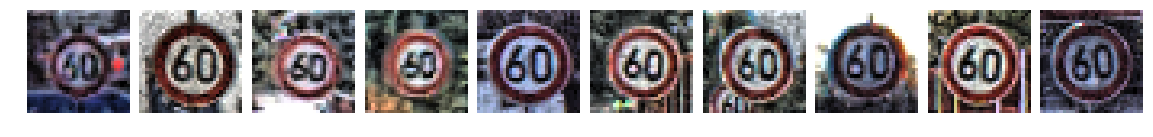

Class Number:4 Sign Name:Speed limit (70km/h) Number of Samples:660


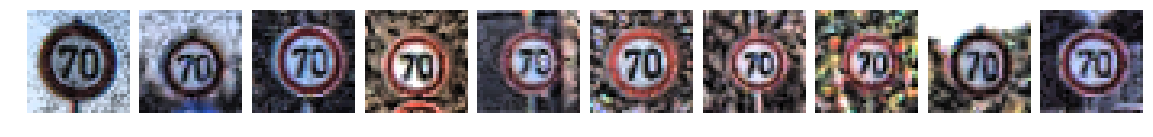

Class Number:5 Sign Name:Speed limit (80km/h) Number of Samples:630


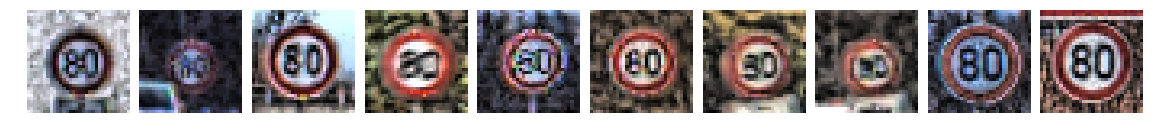

Class Number:6 Sign Name:End of speed limit (80km/h) Number of Samples:150


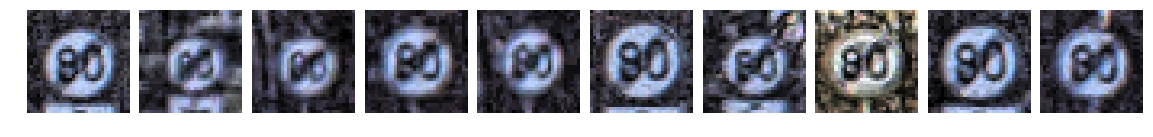

Class Number:7 Sign Name:Speed limit (100km/h) Number of Samples:450


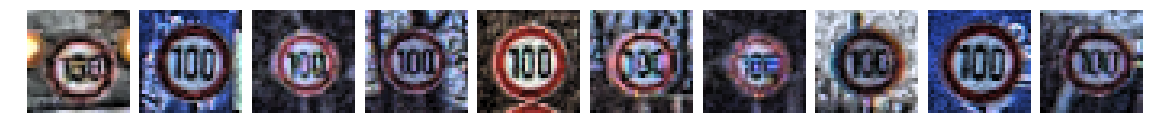

Class Number:8 Sign Name:Speed limit (120km/h) Number of Samples:450


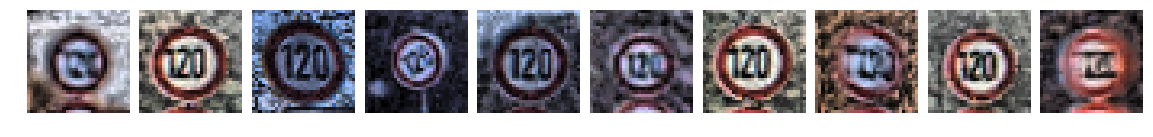

Class Number:9 Sign Name:No passing Number of Samples:480


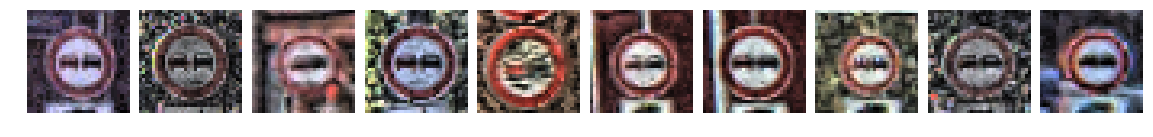

Class Number:10 Sign Name:No passing for vehicles over 3.5 metric tons Number of Samples:660


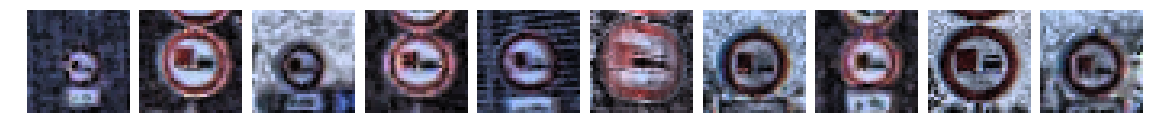

Class Number:11 Sign Name:Right-of-way at the next intersection Number of Samples:420


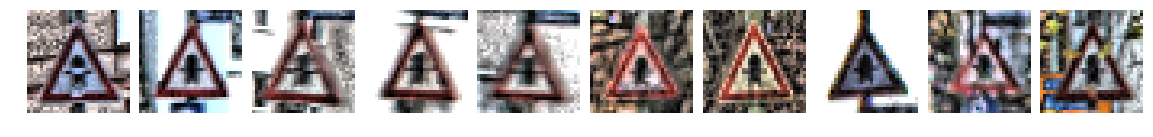

Class Number:12 Sign Name:Priority road Number of Samples:690


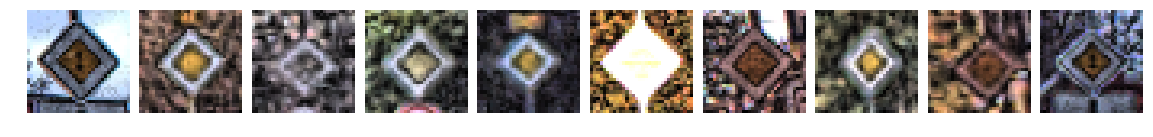

Class Number:13 Sign Name:Yield Number of Samples:720


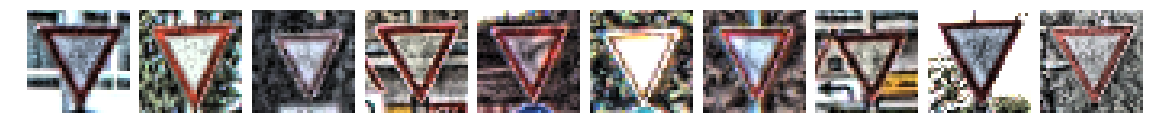

Class Number:14 Sign Name:Stop Number of Samples:270


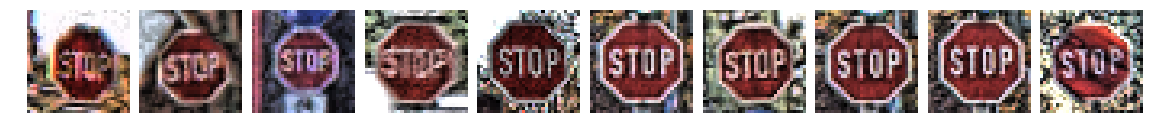

Class Number:15 Sign Name:No vehicles Number of Samples:210


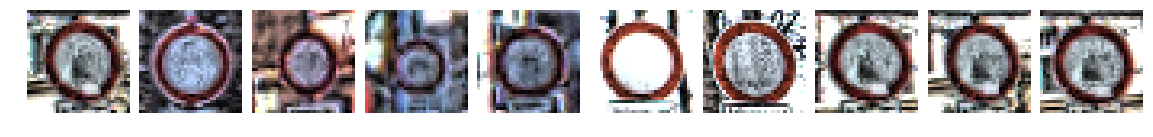

Class Number:16 Sign Name:Vehicles over 3.5 metric tons prohibited Number of Samples:150


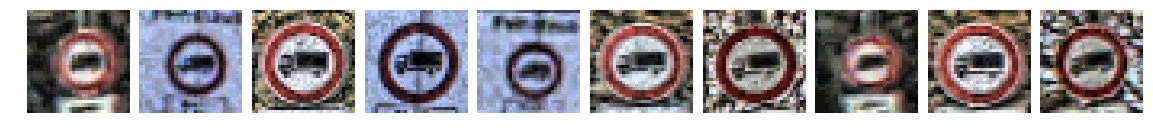

Class Number:17 Sign Name:No entry Number of Samples:360


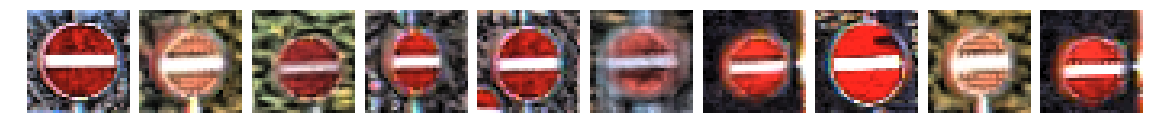

Class Number:18 Sign Name:General caution Number of Samples:390


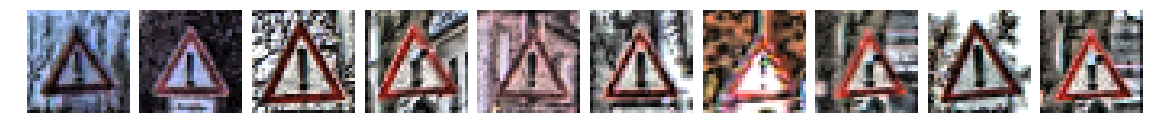

Class Number:19 Sign Name:Dangerous curve to the left Number of Samples:60


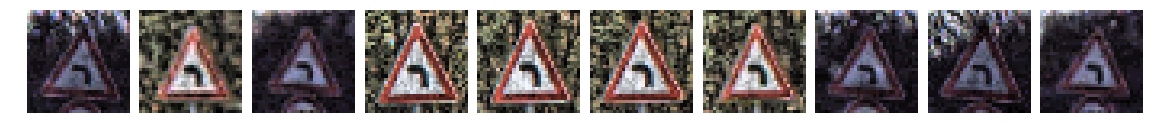

Class Number:20 Sign Name:Dangerous curve to the right Number of Samples:90


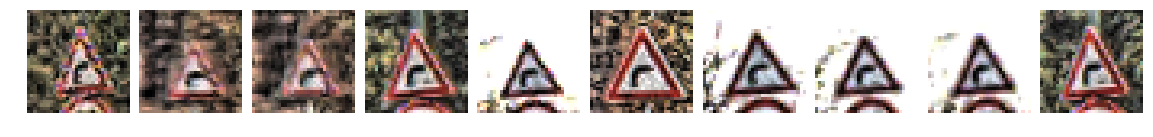

Class Number:21 Sign Name:Double curve Number of Samples:90


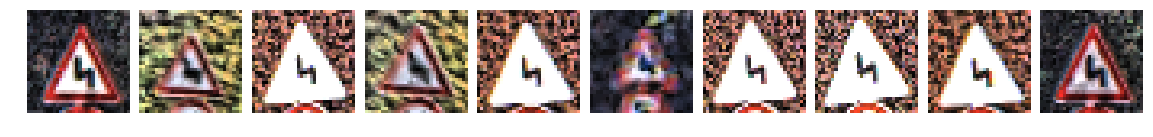

Class Number:22 Sign Name:Bumpy road Number of Samples:120


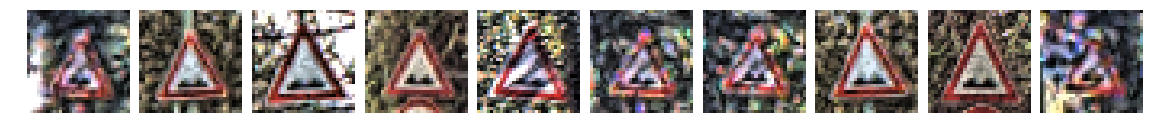

Class Number:23 Sign Name:Slippery road Number of Samples:150


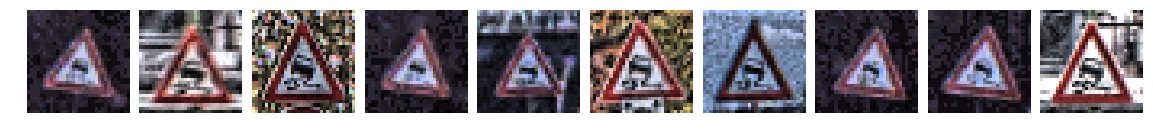

Class Number:24 Sign Name:Road narrows on the right Number of Samples:90


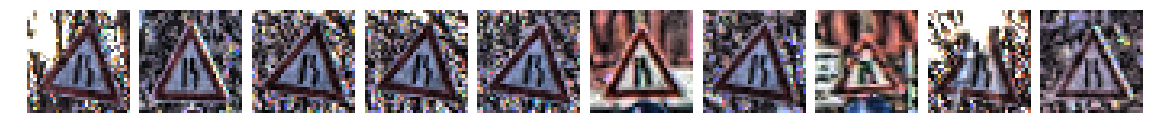

Class Number:25 Sign Name:Road work Number of Samples:480


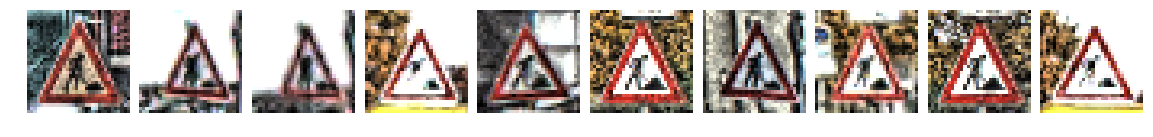

Class Number:26 Sign Name:Traffic signals Number of Samples:180


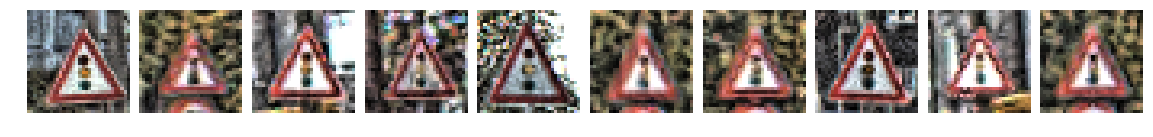

Class Number:27 Sign Name:Pedestrians Number of Samples:60


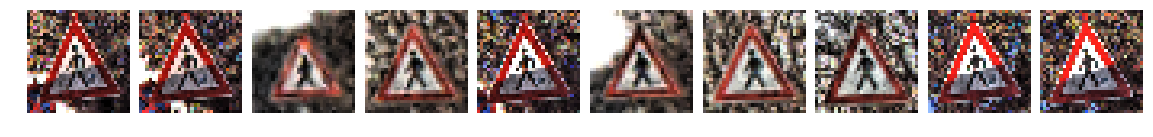

Class Number:28 Sign Name:Children crossing Number of Samples:150


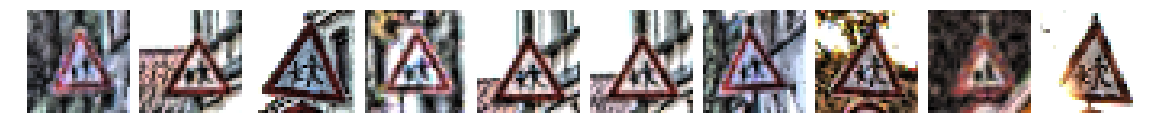

Class Number:29 Sign Name:Bicycles crossing Number of Samples:90


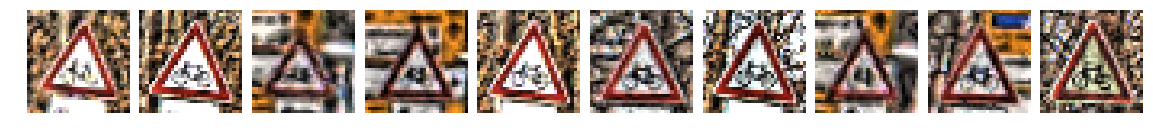

Class Number:30 Sign Name:Beware of ice/snow Number of Samples:150


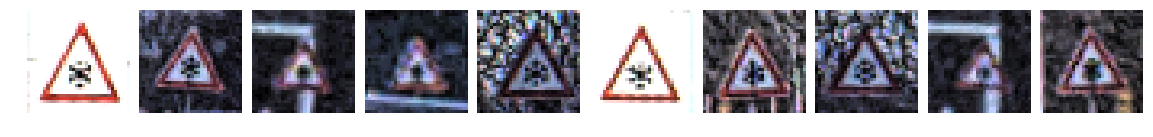

Class Number:31 Sign Name:Wild animals crossing Number of Samples:270


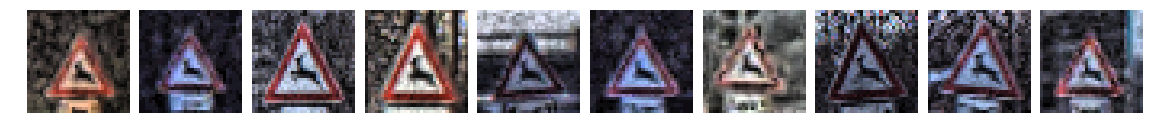

Class Number:32 Sign Name:End of all speed and passing limits Number of Samples:60


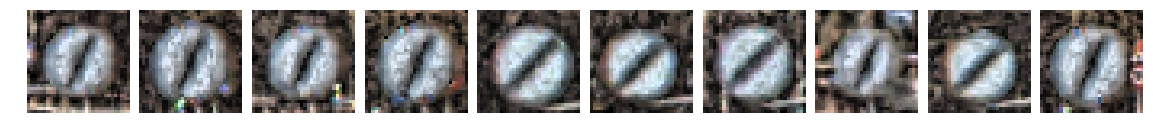

Class Number:33 Sign Name:Turn right ahead Number of Samples:210


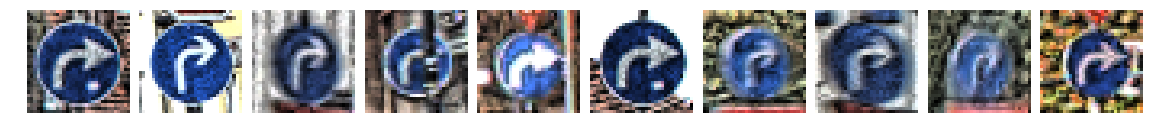

Class Number:34 Sign Name:Turn left ahead Number of Samples:120


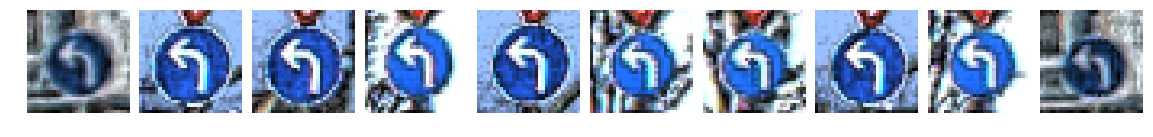

Class Number:35 Sign Name:Ahead only Number of Samples:390


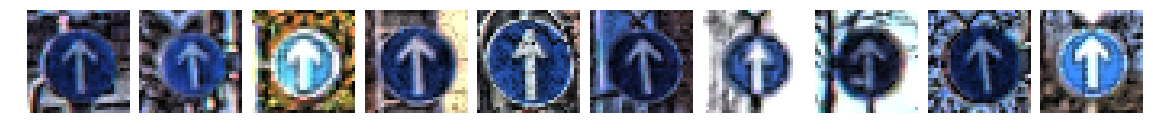

Class Number:36 Sign Name:Go straight or right Number of Samples:120


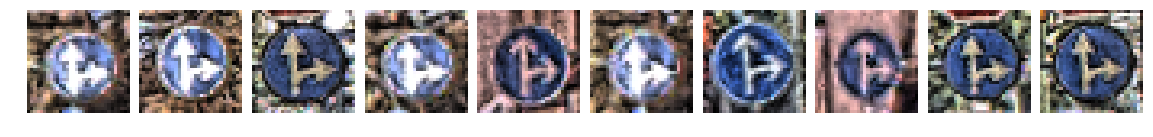

Class Number:37 Sign Name:Go straight or left Number of Samples:60


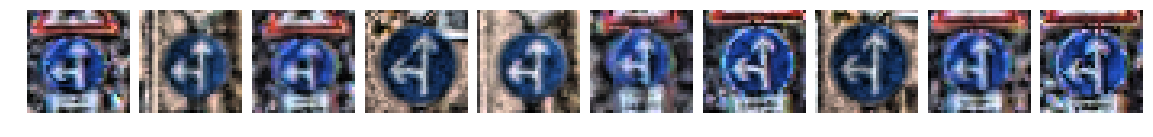

Class Number:38 Sign Name:Keep right Number of Samples:690


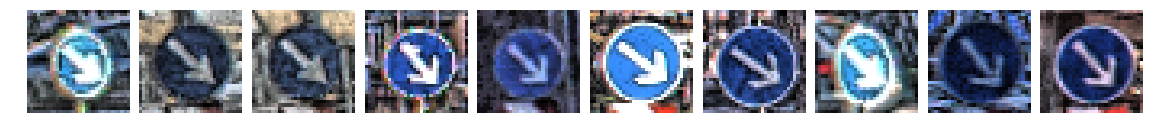

Class Number:39 Sign Name:Keep left Number of Samples:90


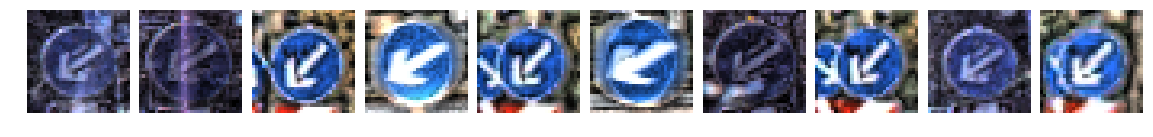

Class Number:40 Sign Name:Roundabout mandatory Number of Samples:90


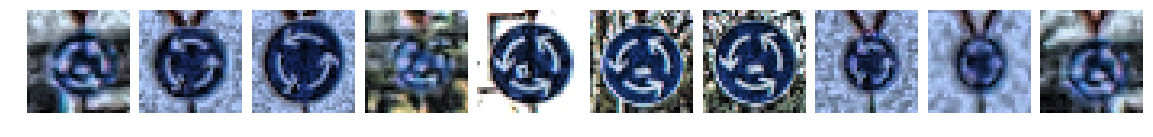

Class Number:41 Sign Name:End of no passing Number of Samples:60


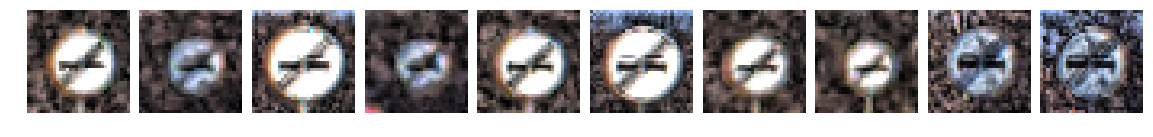

Class Number:42 Sign Name:End of no passing by vehicles over 3.5 metric tons Number of Samples:90


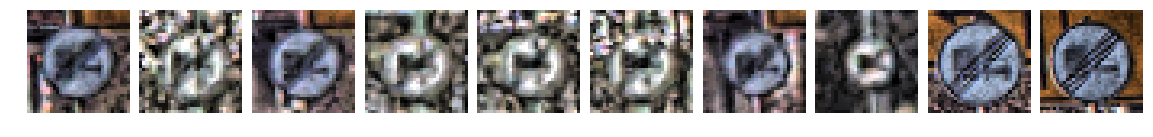

Data Saved in : test_aug.pickle
pre-processing complete. The file is test_aug.pickle


In [2]:
preprocess_data('train.pickle', 'train_aug.pickle', is_scale=True, is_extend=True, is_augment=True, sample_size=3000, intensity_factor=0.75, is_balance=True)
preprocess_data('valid.pickle', 'valid_aug.pickle', is_scale=True)
preprocess_data('test.pickle', 'test_aug.pickle', is_scale=True)